# Popular Restuarants in the Bronx
***

# 1 Introduction
 
## 1.1 Discussion of background

A client needs some research for his new business ventures in the Bronx and surrounding area of New York.
The client wants to open several restaurants within and around the Bronx area. The client needs information on what kind of restaurants are the most popular in this surrounding area so that he can make educated decisions. The client believes in delivering the best quality so the amount of competition is not a problem for him.
The client would also need some recommended neighbourhoods where the restaurants have a high probability where they would do well in addition to the type of restaurants.


## 1.2 Description of problem

Location data is very valuable in the modern world. Modern cell phones keep track of your geospatial data if your location/GPS settings are enabled. Various apps can keep records of ratings/reviews of companies. These location and ratings data are valuable for the public looking for location- and review data as well as for businessmen. But, how can one use location data to determine popularity and to provide valuable insights for entrepreneurs? This project aims at answering this question.


## 2.1 Description of data

Geospatial data of New York will be used for this project that is stored on the IBM server (https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.jason). The format of the data file is in Jason.
Once the neccesary labaries are imported into Python it would be possible to retrieve this geospatial data and retrieve the data that is neccesarry to start the research for the client. To determine what type of restuarants is popular in the surrounding area we can use Python to get this data from the Foursquare website (https://foursquare.com/) by creating an API that can retrieve popularity data from the website. This type of data is valuable for people in the area looking for popular restuarants and good food as well as for entripineurs. 


## 2.2 How the data would be used

The geospatial data of neighbourhoods needs to be accessed from the IBM server.
The different neighborhoods will then be explored by creating a panda dataframe.
Once this dataframe have been created the data can be explored and insights drawn.
I will use geopy library to get the latitude and longitude values of New York City.
Each neiborhood can be analyzed to determine the ideal neiborhood that match the client's criteria.
Foluim will be used to map the various neiborhoods for the presentation.
At this stage I will start utilizing the Foursquare API to explore the neighborhoods and segment them.
Each neighbourhood will be analysed and the most popular restaurants of each neighbourhood will be calculated.
The client can choose from these neigborhoods when making decicions on where to open his restaurants. See the data in the cells below for data format and python code to extract insights.


## 3 Methodology

3.1 All neccesary libaries needs to be imported and installed

In [210]:
!pip install -U numpy

!pip install -U pandas

!pip install -U scipy

!pip install -U scikit-learn

!pip install -U imbalanced-learn


In [211]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


**Access the New York data and extract geo spatial data.**

In [212]:
# Access the data from IBM server
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [213]:
#Load the data
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [214]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [215]:
neighborhoods_data = newyork_data['features']

In [216]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [217]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [218]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [219]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [220]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [221]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


**We will use folium library to visualize geographic details of the Bronx.**

In [222]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [223]:
neighborhoods.shape

(306, 4)

In [224]:
CLIENT_ID = 'NRSTPMMGSZRVEAZW0UGXEDLWQBJPPV4I5CMVAJK5T2A02PJE' # your Foursquare ID
CLIENT_SECRET = 'VCZZWY2FDO2RBUO5AI1EZ3SYSIEG1021RYUQOCK0LBNKJBWQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NRSTPMMGSZRVEAZW0UGXEDLWQBJPPV4I5CMVAJK5T2A02PJE
CLIENT_SECRET:VCZZWY2FDO2RBUO5AI1EZ3SYSIEG1021RYUQOCK0LBNKJBWQ


In [256]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [226]:
#get Geo location of Bronx
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.8466508, -73.8785937.


In [227]:
# create map of Bronx using latitude and longitude values
map_bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

In [228]:

LIMIT = 100 # limit of number of venues returned by Foursquare API



radius = 500 # define radius



# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NRSTPMMGSZRVEAZW0UGXEDLWQBJPPV4I5CMVAJK5T2A02PJE&client_secret=VCZZWY2FDO2RBUO5AI1EZ3SYSIEG1021RYUQOCK0LBNKJBWQ&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [229]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60b6314362a525488cf9ad20'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLn

In [230]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [231]:
# new data frame called Bronx venues
bronx_venues = getNearbyVenues(names=bronx_data['Neighborhood'],
                                   latitudes=bronx_data['Latitude'],
                                   longitudes=bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


**Let's check the size of the resulting dataframe**

In [232]:
print(bronx_venues.shape)
bronx_venues.head()

(1209, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [233]:
bronx_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,32,32,32,32,32,32
Baychester,20,20,20,20,20,20
Bedford Park,35,35,35,35,35,35
Belmont,100,100,100,100,100,100
Bronxdale,12,12,12,12,12,12
Castle Hill,6,6,6,6,6,6
City Island,29,29,29,29,29,29
Claremont Village,18,18,18,18,18,18
Clason Point,13,13,13,13,13,13


In [234]:
summary = bronx_venues.groupby('Neighborhood').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

,Neighborhood,Count
0,Fieldston,3
1,Williamsbridge,5
2,Castle Hill,6
3,Edenwald,7
4,Country Club,7


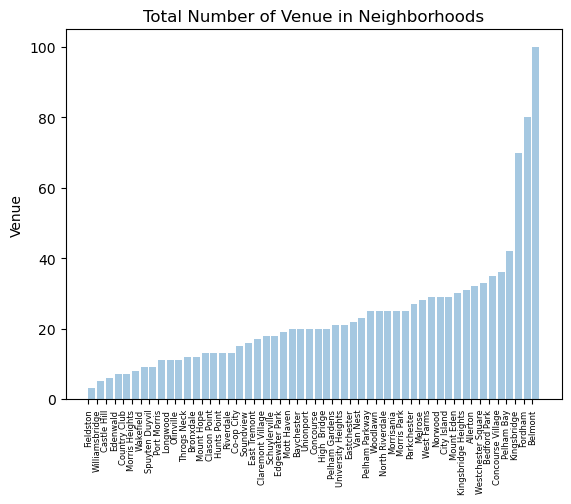

In [235]:
#Insert a bar cahrt to visualize bigger picture of data
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = summary.Neighborhood
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='edge', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Neighborhoods')
plt.xticks(rotation=90, size=6)

plt.show()

**This figure shows that Neighborhoods Kingsbridge, Fordham & Belmonth have many venues and would be possibly good locations for my clients new restuarants.**

In [236]:
# analyze each neighborhood
# one hot encoding
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]

bronx_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Bike Trail,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Donut Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts School,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Venue,Nightclub,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Puerto Rican Restaurant,Rental Car Location,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Social Club,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Weight Loss Center,Wings Joint,Women's Store
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [237]:
# mean of frequency of occurence
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
bronx_grouped

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Bike Trail,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Donut Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts School,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Venue,Nightclub,Outdoor Sculpture,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Puerto Rican Restaurant,Rental Car Location,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Social Club,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Weight Loss Center,Wings Joint,Women's Store
0,Allerton,0.00000,0.0000,0.0000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.03125,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.031250,0.00,0.093750,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.031250,0.000000,0.00,0.062500,0.000000,0.031250,0.000000,0.062500,0.000000,0.00000,0.00000,0.031250,0.000000,0.000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.03125,0.000000,0.000000,0.0000,0.031250,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.00,0.093750,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.00,0.0,0.000000,0.062500,0.000000,0.00,0.000000,0.00,0.000000,0.062500,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Baychester,0.00000,0.0000,0.0000,0.000000,0.05,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,

**Lets use K means to cluster the neighborhoods. K means is verry popular to cluster data and is a unsuprvised learning method.**

In [238]:
# set number of clusters
kclusters = 2

bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [239]:
# most common venues of each neigborhood
num_top_venues = 5

for hood in bronx_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bronx_grouped[bronx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                venue  freq
0         Pizza Place  0.09
1  Chinese Restaurant  0.09
2                 Spa  0.06
3         Supermarket  0.06
4       Deli / Bodega  0.06


----Baychester----
                 venue  freq
0           Donut Shop  0.10
1   Spanish Restaurant  0.05
2       Sandwich Place  0.05
3  Fried Chicken Joint  0.05
4  Sporting Goods Shop  0.05


----Bedford Park----
                venue  freq
0               Diner  0.11
1         Pizza Place  0.11
2  Mexican Restaurant  0.09
3       Deli / Bodega  0.06
4      Sandwich Place  0.06


----Belmont----
                venue  freq
0  Italian Restaurant  0.18
1         Pizza Place  0.10
2       Deli / Bodega  0.08
3              Bakery  0.05
4        Liquor Store  0.03


----Bronxdale----
                           venue  freq
0             Chinese Restaurant  0.17
1             Spanish Restaurant  0.08
2             Mexican Restaurant  0.08
3  Paper / Office Supplies Store  0.08
4    Eastern European Restau

                  venue  freq
0           Pizza Place  0.14
1  Fast Food Restaurant  0.10
2        Cosmetics Shop  0.05
3        History Museum  0.05
4   Fried Chicken Joint  0.05


----Van Nest----
            venue  freq
0   Deli / Bodega  0.17
1     Pizza Place  0.17
2     Bus Station  0.09
3  Cosmetics Shop  0.04
4     Supermarket  0.04


----Wakefield----
            venue  freq
0        Pharmacy  0.22
1  Sandwich Place  0.11
2      Donut Shop  0.11
3  Ice Cream Shop  0.11
4   Deli / Bodega  0.11


----West Farms----
                venue  freq
0         Bus Station  0.14
1            Bus Stop  0.10
2          Donut Shop  0.07
3  Chinese Restaurant  0.07
4                Park  0.07


----Westchester Square----
                  venue  freq
0  Fast Food Restaurant  0.09
1              Pharmacy  0.06
2        Baseball Field  0.06
3    Mexican Restaurant  0.06
4            Donut Shop  0.06


----Williamsbridge----
                  venue  freq
0     Convenience Store   0.2
1         

**The list above shows the frequency of most popular restuarants in each neighborhood.**

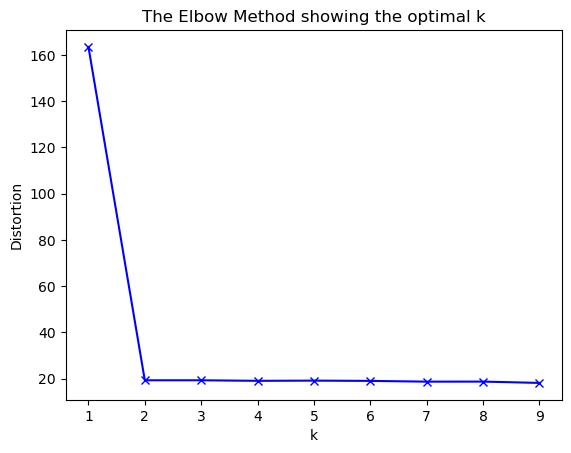

In [240]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(bronx_grouped_clustering)
    #kmeanModel.fit(bronx_grouped_clustering)
    distortions.append(sum(np.min(cdist(bronx_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / bronx_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**The number 2 would be the ideal number to use in the Kcluster input. Lets create a new dataframe that include the clusters.**

In [257]:
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [258]:
neighborhoods_sorted_venues.head()

NameError: name 'neighborhoods_sorted_venues' is not defined

In [242]:
bronx_merged = bronx_data

# add clustering labels
bronx_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bronx_merged = bronx_merged.join(neighborhoods_sorted_venues.set_index('Neighborhood'), on='Neighborhood')

bronx_merged.head() # check the last columns!

ValueError: columns overlap but no suffix specified: Index(['Cluster Labels'], dtype='object')

**Lets calculate the most common venue in each cluster**

In [243]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Most common venue in clusters is also Pizza Place (N=12). My advice to my client would be to open Pizza Restuarants.

In [245]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Text(0, 0.5, 'Clusters')

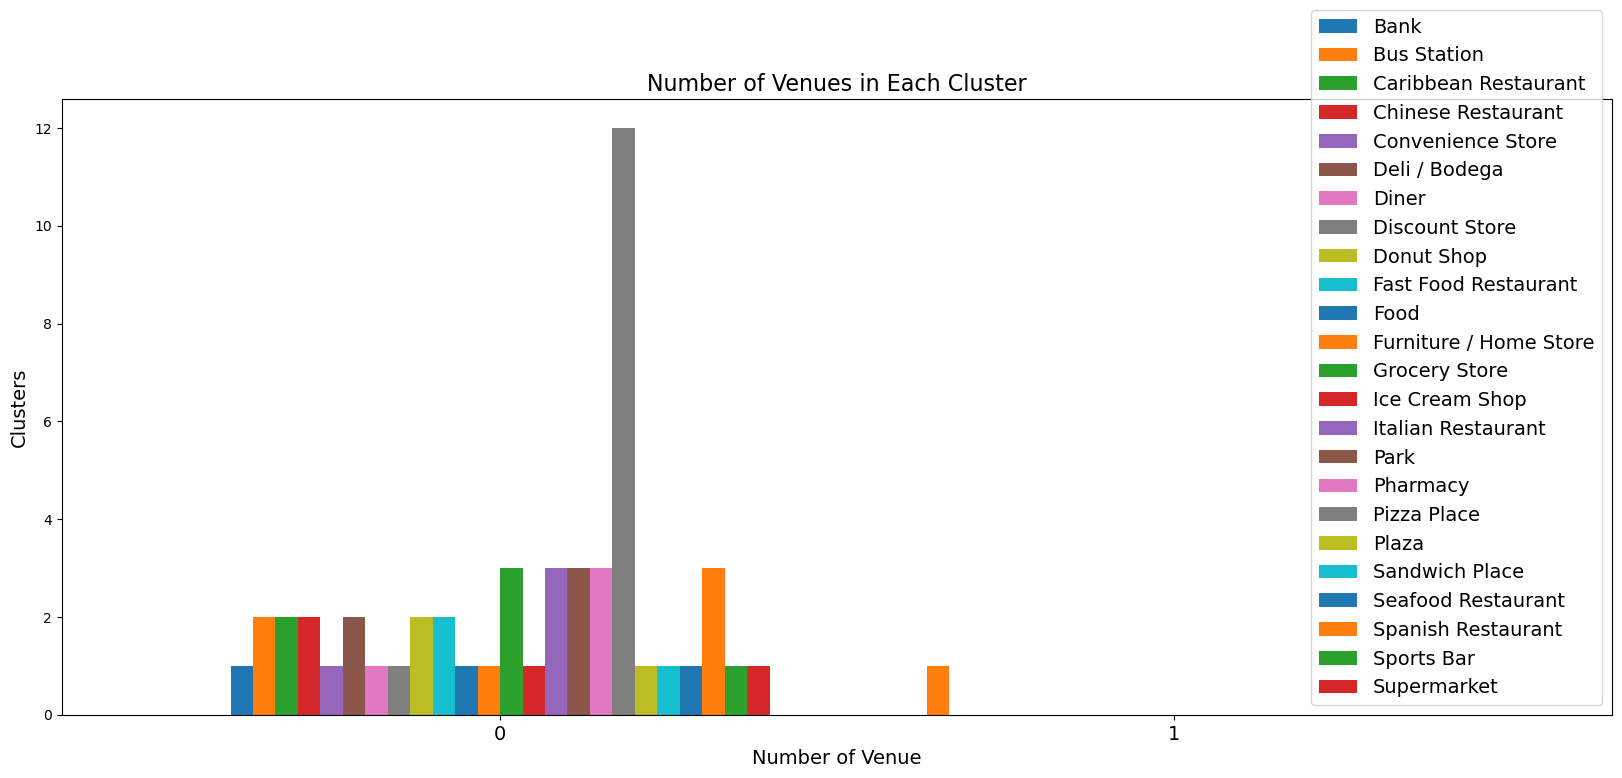

In [246]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

**We can see that Pizza Restuarants are verry common and it seems that people in this area enjoy good pizza.**

In [247]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Chinese Restaurant,Spa,Supermarket,Deli / Bodega,Pharmacy,Discount Store,Smoke Shop,Donut Shop,Breakfast Spot
1,Baychester,Donut Shop,Spanish Restaurant,Sandwich Place,Fried Chicken Joint,Sporting Goods Shop,Mexican Restaurant,Supermarket,Men's Store,Fast Food Restaurant,Gym / Fitness Center
2,Bedford Park,Diner,Pizza Place,Mexican Restaurant,Deli / Bodega,Sandwich Place,Chinese Restaurant,Food Truck,Smoke Shop,Spanish Restaurant,Discount Store
3,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Liquor Store,Dessert Shop,Spanish Restaurant,Grocery Store,Bank,Coffee Shop
4,Bronxdale,Chinese Restaurant,Spanish Restaurant,Mexican Restaurant,Paper / Office Supplies Store,Eastern European Restaurant,Bank,Performing Arts Venue,Gym,Breakfast Spot,Italian Restaurant
5,Castle Hill,Bus Station,Pizza Place,Diner,Pharmacy,Market,Bank,ATM,Moving Target,Music Venue,Nightclub
6,City Island,Seafood Restaurant,Deli / Bodega,Thrift / Vintage Store,Cosmetics Shop,Baseball Field,Smoke Shop,French Restaurant,Music Venue,Bus Station,Spanish Restaurant
7,Claremont Village,Bus Station,Deli / Bodega,Grocery Store,Bakery,Chinese Restaurant,Liquor Store,Park,Gym,Caribbean Restaurant,Food
8,Clason Point,Park,Convenience Store,Grocery Store,Playground,Scenic Lookout,Bus Stop,South American Restaurant,Boat or Ferry,Pool,Home Service
9,Co-op City,Fast Food Restaurant,Bagel Shop,Park,Gift Shop,Donut Shop,Bus Station,Trail,Salon / Barbershop,Grocery Store,Restaurant


In [248]:
popular_df = neighborhoods_venues_sorted
popular_df = pd.DataFrame(['Pizza', 'Italian', 'Chinese', 'Deli'], columns = ['words'])


In [249]:
neighborhoods_venues_sorted.describe()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,52,52,52,52,52,52,52,52,52,52,52
unique,52,24,30,32,36,39,35,37,40,37,35
top,Allerton,Pizza Place,Pizza Place,Donut Shop,Bakery,Park,Bus Station,Fast Food Restaurant,Music Venue,Mobile Phone Shop,Sandwich Place
freq,1,12,8,5,3,3,4,3,4,5,4


**I can recommend Allerton to my client as a good location for his pizza restuarant.
Lets do some more analysis on popular restuarants for my client.**

In [250]:
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()

Pizza Place               12
Italian Restaurant         3
Pharmacy                   3
Grocery Store              3
Park                       3
Spanish Restaurant         3
Bus Station                3
Caribbean Restaurant       2
Fast Food Restaurant       2
Donut Shop                 2
Chinese Restaurant         2
Deli / Bodega              2
Ice Cream Shop             1
Supermarket                1
Convenience Store          1
Furniture / Home Store     1
Bank                       1
Diner                      1
Food                       1
Sandwich Place             1
Discount Store             1
Sports Bar                 1
Plaza                      1
Seafood Restaurant         1
Name: 1st Most Common Venue, dtype: int64

In [251]:
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts().to_frame()

,1st Most Common Venue
Pizza Place,12
Italian Restaurant,3
Pharmacy,3
Grocery Store,3
Park,3
Spanish Restaurant,3
Bus Station,3
Caribbean Restaurant,2
Fast Food Restaurant,2
Donut Shop,2


## 4. Results

The analysis shows that Pizza restuarants/places are the most popular in the neighborhoods of the study area (N=12). Neighborhoods where Pizza places are most frequent include Allerton, East Tremont, High Bridge, Kings Bridge, kingsbridge Height, Morris Park, North Riverdale, Norwood, Schuylerville, University Height and Woodlawn. Refer to the map below that shows the most common venues in each cluster. This will be good locations for potential new restuarants (see table below).

Text(0, 0.5, 'Clusters')

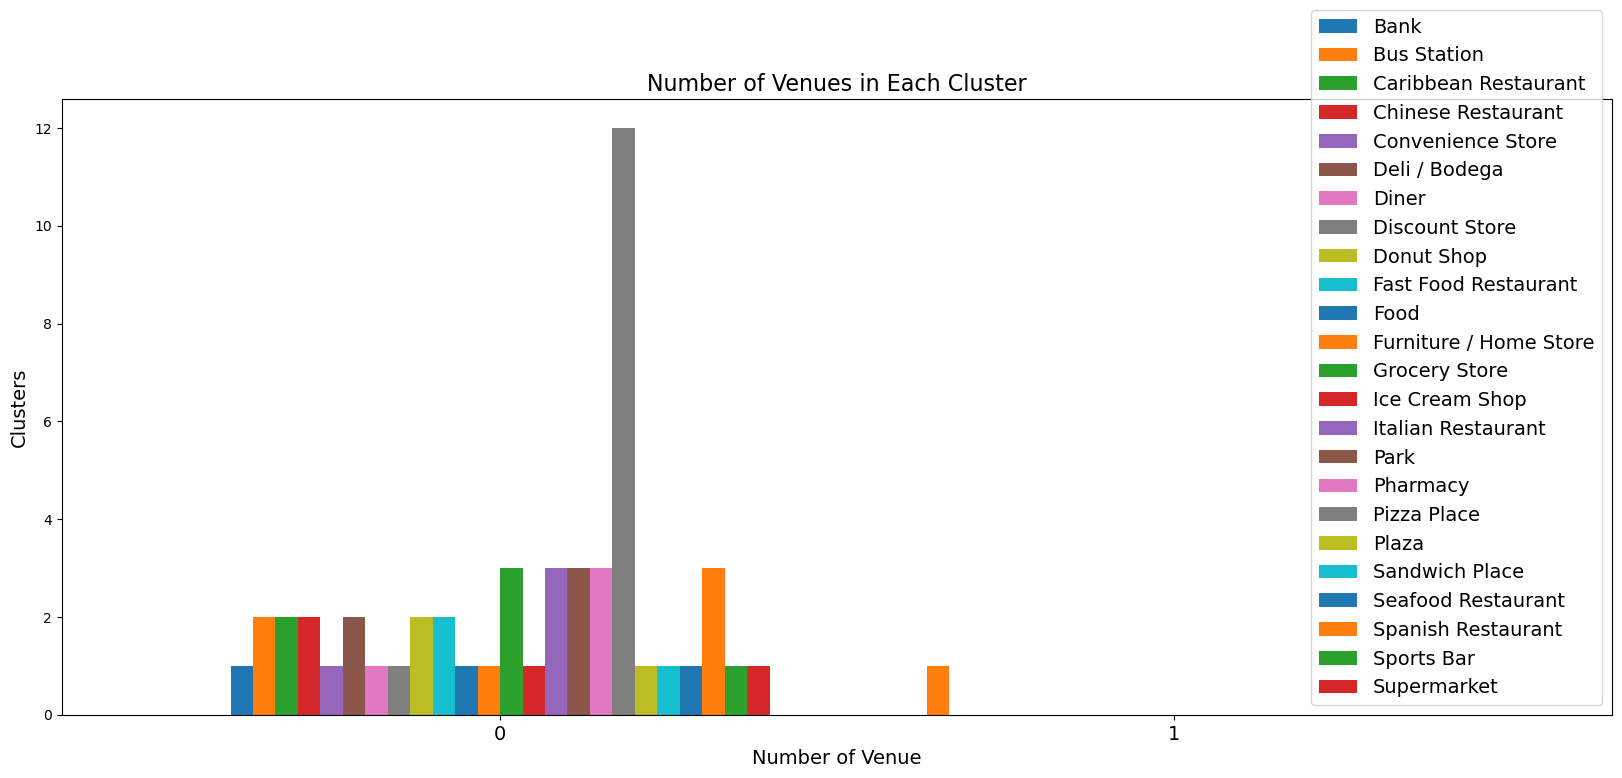

In [252]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

In [253]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [259]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Chinese Restaurant,Spa,Supermarket,Deli / Bodega,Pharmacy,Discount Store,Smoke Shop,Donut Shop,Breakfast Spot
1,Baychester,Donut Shop,Spanish Restaurant,Sandwich Place,Fried Chicken Joint,Sporting Goods Shop,Mexican Restaurant,Supermarket,Men's Store,Fast Food Restaurant,Gym / Fitness Center
2,Bedford Park,Diner,Pizza Place,Mexican Restaurant,Deli / Bodega,Sandwich Place,Chinese Restaurant,Food Truck,Smoke Shop,Spanish Restaurant,Discount Store
3,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Liquor Store,Dessert Shop,Spanish Restaurant,Grocery Store,Bank,Coffee Shop
4,Bronxdale,Chinese Restaurant,Spanish Restaurant,Mexican Restaurant,Paper / Office Supplies Store,Eastern European Restaurant,Bank,Performing Arts Venue,Gym,Breakfast Spot,Italian Restaurant
5,Castle Hill,Bus Station,Pizza Place,Diner,Pharmacy,Market,Bank,ATM,Moving Target,Music Venue,Nightclub
6,City Island,Seafood Restaurant,Deli / Bodega,Thrift / Vintage Store,Cosmetics Shop,Baseball Field,Smoke Shop,French Restaurant,Music Venue,Bus Station,Spanish Restaurant
7,Claremont Village,Bus Station,Deli / Bodega,Grocery Store,Bakery,Chinese Restaurant,Liquor Store,Park,Gym,Caribbean Restaurant,Food
8,Clason Point,Park,Convenience Store,Grocery Store,Playground,Scenic Lookout,Bus Stop,South American Restaurant,Boat or Ferry,Pool,Home Service
9,Co-op City,Fast Food Restaurant,Bagel Shop,Park,Gift Shop,Donut Shop,Bus Station,Trail,Salon / Barbershop,Grocery Store,Restaurant


## 5. Discussion

The result section will give a good indication of people in neighborhoods that love to eat pizza.  Good quality pizza restuarnats will do well in these areas. My client can use the results provided to decide where he is going to open his restuarants. I used the Kmeans algorithm as part of the clustering analysis. The top most popular venues location was mapped to give the client a indication of popular areas in each neighborhood. Finally one can see from the analysis that piza places are very popular in the Bronx and surrounding neighborhoods.

## 6. Conclusion

This project aims at using data readily available and to gain valuable insights from it. This information can be of great use for entrepreneurs to make educated decisions on where to open new areas. It also shows how python can be used for various analysis using geospatial data. 